# دیدن عکس ها

In [46]:
import glob
import nibabel as nib  # برای خواندن فایل‌های NIfTI
import numpy as np
import cv2
import matplotlib.pyplot as plt

# مسیر فایل‌های NIfTI
imagefiles = glob.glob("C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Dataset/segmentation/Data2/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/*.nii")
imagefiles.sort()

xtest = []

for filename in imagefiles:
    # خواندن فایل NIfTI
    img_nii = nib.load(filename)
    img_data = img_nii.get_fdata()  # داده‌های 3D یا 4D
    
    # تبدیل به numpy array و پردازش (مثال: انتخاب یک اسلایس 2D)
    if len(img_data.shape) == 4:  # اگر داده 4D باشد (مثلاً چند مودالیتی)
        img_slice = img_data[:, :, img_data.shape[2] // 2, 0]  # انتخاب اسلایس میانی و مودالیت اول
    else:  # اگر داده 3D باشد
        img_slice = img_data[:, :, img_data.shape[2] // 2]  # انتخاب اسلایس میانی
    
    # نرمال‌سازی و تغییر سایز
    img_slice = cv2.normalize(img_slice, None, 0, 255, cv2.NORM_MINMAX)  # نرمال‌سازی به محدوده [0, 255]
    img_slice = cv2.resize(img_slice, (150, 150))  # تغییر سایز
    img_slice = img_slice / 255.0  # نرمال‌سازی نهایی
    
    xtest.append(img_slice)

num_images = len(xtest)
print(f"تعداد تصاویر پردازش‌شده: {num_images}")

تعداد تصاویر پردازش‌شده: 5


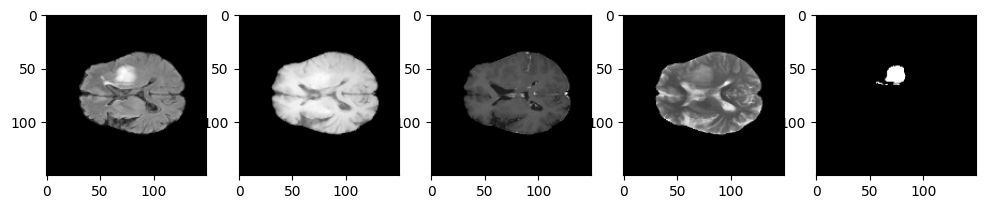

In [47]:
fig , ax = plt.subplots(1,5, figsize=(12,8))
ax[0].imshow(xtest[0], cmap='gray')
ax[1].imshow(xtest[1], cmap='gray')
ax[2].imshow(xtest[2], cmap='gray')
ax[3].imshow(xtest[3], cmap='gray')
ax[4].imshow(xtest[4], cmap='gray')

# تبدیل عکس ها به دو بعدی

In [55]:
import nibabel as nib
import numpy as np
import os
import cv2

# مسیر ورودی و خروجی
input_path = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Dataset/segmentation/Data2/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_362/'  # پوشه یکی از بیماران
output_img_path = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Dataset/segmentation/Data2/images'
output_mask_path = 'C:/Users/Shahab/Downloads/Jupyter/Brain-Tumor/Dataset/segmentation/Data2/masks'

os.makedirs(output_img_path, exist_ok=True)
os.makedirs(output_mask_path, exist_ok=True)

# انتخاب modality (مثلاً FLAIR یا T1CE)
img_file = os.path.join(input_path, 'BraTS20_Training_362_flair.nii')
mask_file = os.path.join(input_path, 'BraTS20_Training_362_seg.nii')

# بارگذاری تصویر و ماسک
img_3d = nib.load(img_file).get_fdata()
mask_3d = nib.load(mask_file).get_fdata()

c = 1293
# برش‌زدن اسلایس‌های وسط (برای تمرکز روی نواحی مهم)
for i in range(60, 100):  # می‌تونی از کل range هم استفاده کنی
    img_slice = img_3d[:, :, i]
    mask_slice = mask_3d[:, :, i]

    # نرمال‌سازی تصویر
    img_slice = (img_slice - np.min(img_slice)) / (np.max(img_slice) - np.min(img_slice))
    img_slice = (img_slice * 255).astype(np.uint8)
    mask_slice = (mask_slice > 0).astype(np.uint8) * 255

    # ذخیره‌سازی
    img_filename = os.path.join(output_img_path, f'image_{c}.png')
    mask_filename = os.path.join(output_mask_path, f'image_{c}.png')
    c += 1
    cv2.imwrite(img_filename, img_slice)
    cv2.imwrite(mask_filename, mask_slice)